**Data Exploration (EDA)**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Load the dataset
train = pd.read_csv("C:/Users/victus/Data_Science/Done/Logistic Regression/Titanic_train.csv")
test = pd.read_csv("C:/Users/victus/Data_Science/Done/Logistic Regression/Titanic_test.csv")


In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

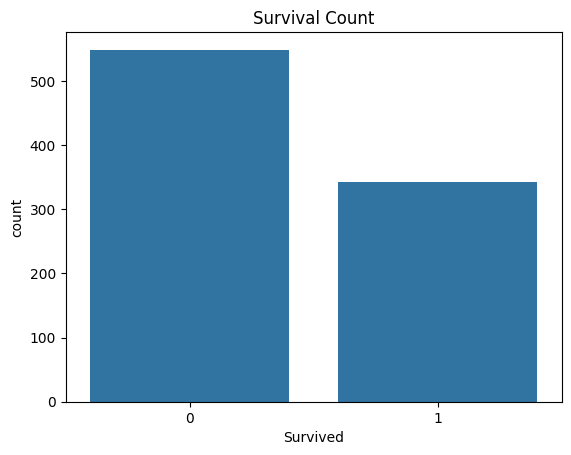

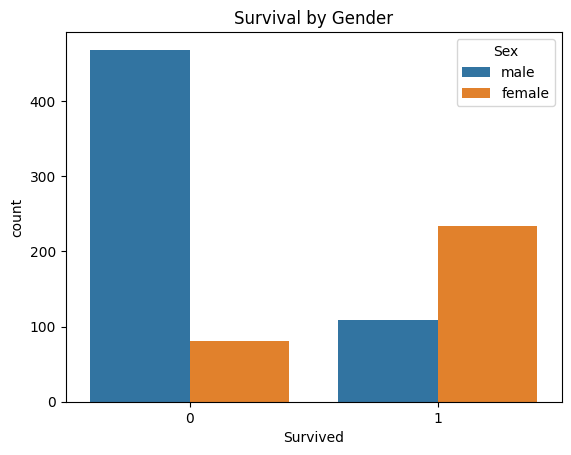

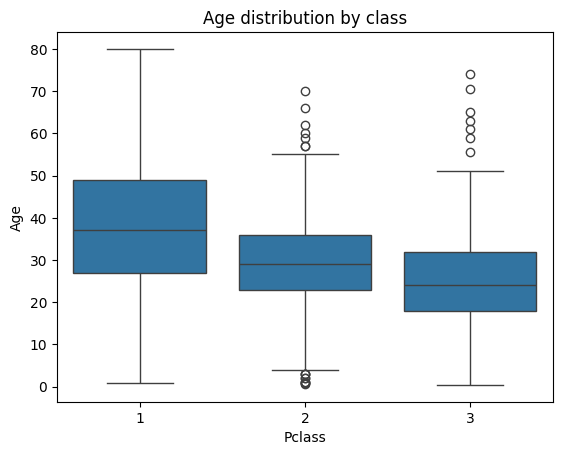

In [27]:
# Visualizations
sns.countplot(x='Survived', data=train)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Survival by Gender")
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train)
plt.title("Age distribution by class")
plt.show()

**Data Preprocessing**

In [28]:
from sklearn.preprocessing import LabelEncoder

# Fill missing Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill missing Fare in test set
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# Drop columns not needed
train = train.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
test_ids = test['PassengerId']
test = test.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])



C:\Users\victus\AppData\Local\Temp\ipykernel_16896\3238182862.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\victus\AppData\Local\Temp\ipykernel_16896\3238182862.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

**Model Building**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = train.drop('Survived',axis=1)
y = train['Survived']

# Split into train/test for validation
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.2, random_state=42)

#Train Logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC AUC Score: 0.8823680823680824


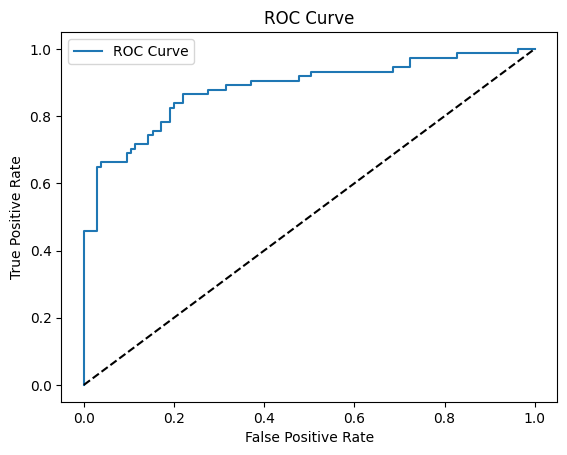

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predict and evaluate
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [31]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print(coeff_df.sort_values(by='Coefficient', key=abs, ascending=False))


    Feature  Coefficient
1       Sex    -2.596994
0    Pclass    -0.930680
3     SibSp    -0.293905
6  Embarked    -0.218777
4     Parch    -0.111852
2       Age    -0.030433
5      Fare     0.002534


In [32]:
import pickle

# Save your trained model (assume variable name is 'model')
with open("Logistic.pkl", "wb") as f:
    pickle.dump(model, f)
